In [2]:
import pandas as pd
Warning
import tensorflow as tf
from  tensorflow import  keras
from keras import models,Sequential,layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
dataset=pd.read_csv('../car_data.csv')
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [38]:
dataset.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [39]:
dataset=dataset.drop(columns=['User ID'],axis=1)


In [40]:
dataset=pd.get_dummies(columns=['Gender'],drop_first=True,data=dataset)

In [42]:
x=dataset.drop(columns='Purchased',axis=1)
y=dataset['Purchased']

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


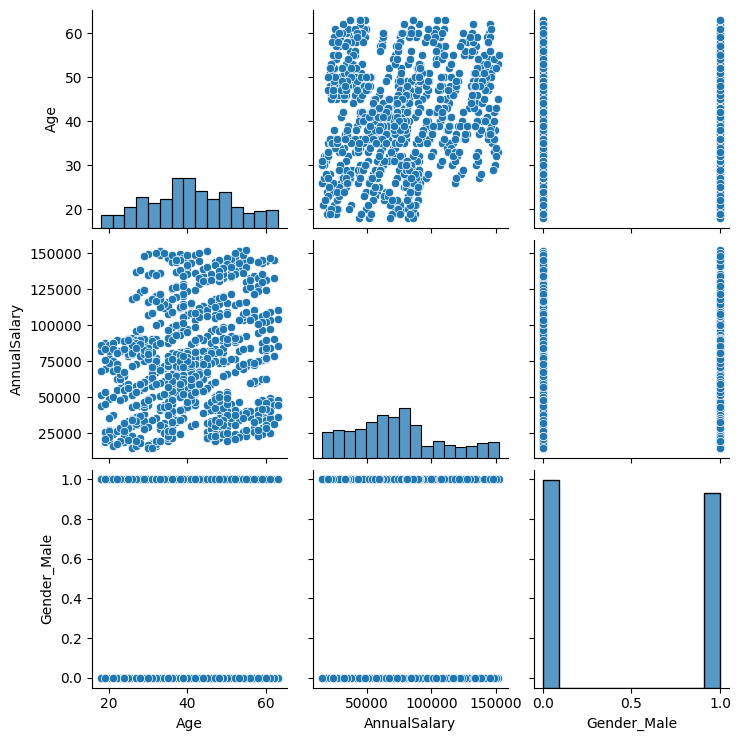

In [43]:
sns.pairplot(x)
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler
tf.keras.layers.Normalization
from sklearn.model_selection import train_test_split
str_x=StandardScaler()
x=str_x.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,shuffle=True)

#### fit the 

In [60]:
model=models.Sequential([
    tf.keras.layers.Dense(128,input_dim=x_train.shape[1],activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [61]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#callbacks=tf.keras.callbacks.EarlyStopping(patience=5)
history=model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=1,validation_split=0.2)

Epoch 1/100
19/19 [==============================] - 2s 18ms/step - loss: 0.6605 - accuracy: 0.6650 - val_loss: 0.6105 - val_accuracy: 0.8800
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5671 - accuracy: 0.8217 - val_loss: 0.4594 - val_accuracy: 0.8867
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.4586 - accuracy: 0.8267 - val_loss: 0.3129 - val_accuracy: 0.8800
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 0.3562 - accuracy: 0.8650 - val_loss: 0.2651 - val_accuracy: 0.8867
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.8700 - val_loss: 0.2499 - val_accuracy: 0.9000
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3251 - accuracy: 0.8683 - val_loss: 0.2407 - val_accuracy: 0.9000
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3138 - accuracy: 0.8667 - val_loss: 0.2360 - val_accuracy: 0.9067
Epoch 8/100


In [62]:
def loss_plot(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('epochs')
    plt.ylabel('loss values')
    plt.legend()
    plt.show()

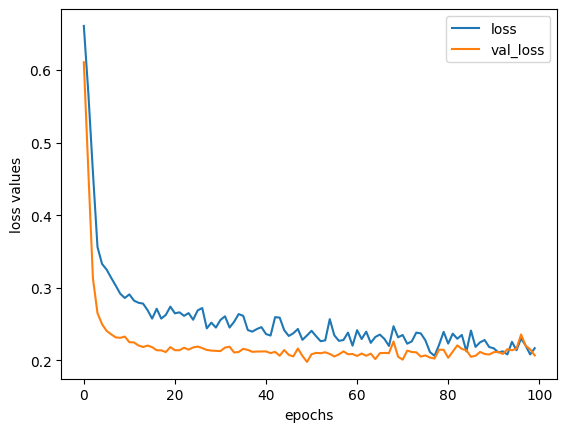

In [63]:
loss_plot(history)

In [64]:
def accuracy_plot(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val accuracy')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy plot')
    plt.show()

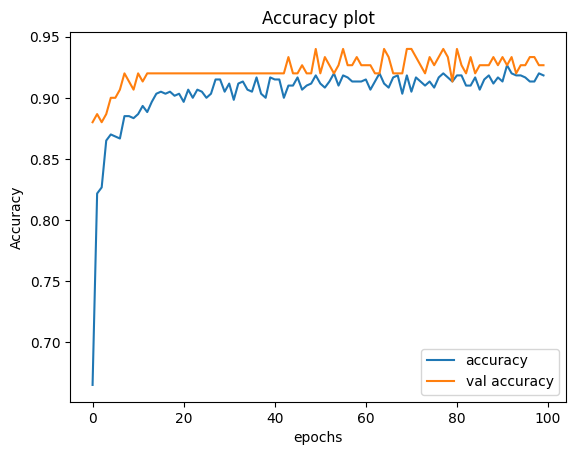

In [65]:
accuracy_plot(history)

In [73]:
y_pred=model.predict(x_test)
threshold = 0.5
y_pred=np.where(y_pred >= threshold,1,0)
model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8960


[0.35928836464881897, 0.8960000276565552]

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       138
           1       0.88      0.88      0.88       112

    accuracy                           0.90       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.90      0.90      0.90       250

